In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

In [ ]:
dataset = CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)

100%|██████████| 170M/170M [00:03<00:00, 53.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


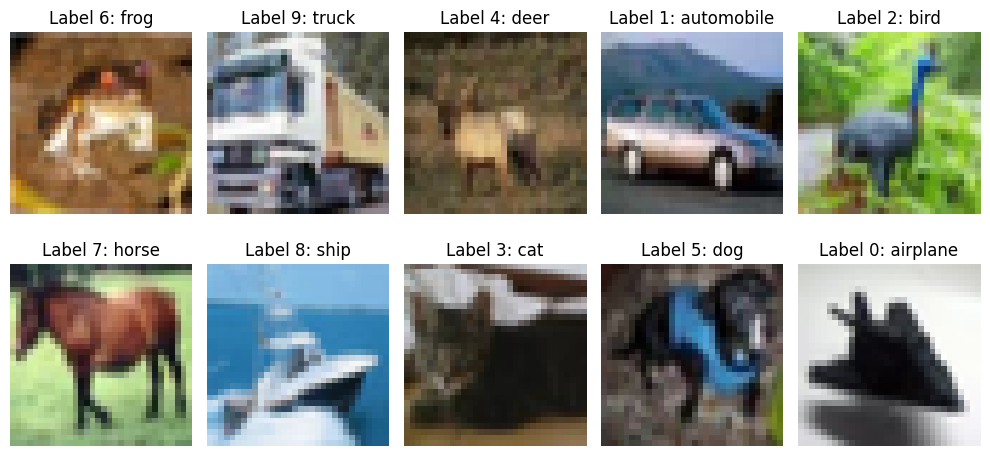

In [ ]:
label_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

labels_seen = {}
for image, label in dataset:
    if label not in labels_seen:
        labels_seen[label] = image
    if len(labels_seen) == 10:
        break

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, (label, image) in zip(axes.flat, labels_seen.items()):
    ax.imshow(image.permute(1, 2, 0))
    ax.set_title(f"Label {label}: {label_names[label]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Normalize((0.5,), (0.5,))
])

transformed_data = []
for image, label in dataset:
    image = transform(image)
    image = image.view(-1)
    transformed_data.append((image, label))


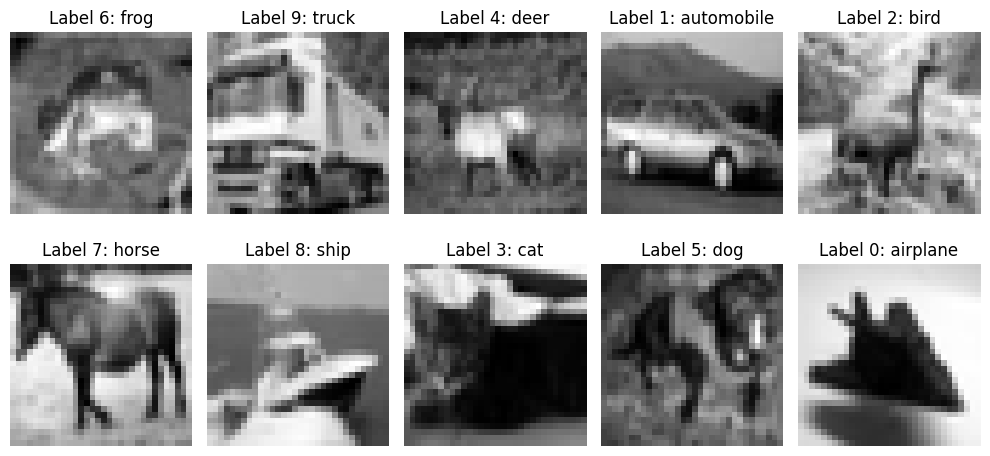

In [ ]:
labels_seen = {}
for image, label in transformed_data:
    if label not in labels_seen:
        labels_seen[label] = image
    if len(labels_seen) == 10:
        break

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, (label, image) in zip(axes.flat, labels_seen.items()):
    reshaped_image = image.view(32, 32)
    ax.imshow(reshaped_image, cmap='gray')
    ax.set_title(f"Label {label}: {label_names[label]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
